In [102]:
#from customplot import *

#import sqlite3
%autosave 0
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

Autosave disabled


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def printcfm(y_test,y_pred,title='confusion matrix'):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title=title)

In [4]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [5]:
# df=pd.read_csv('baseProjeto_over.csv', index_col=0)
# df

In [6]:
#df.columns

In [7]:
# X=df[['ATRIB_MAX1',
#        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
#        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

In [8]:
# X.head()

In [9]:
# X.info()

In [10]:
'''
#cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',
       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',
       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]
#X[cat] = X[cat].astype('category')

X.info()
'''

"\n#cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',\n       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',\n       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]\n#X[cat] = X[cat].astype('category')\n\nX.info()\n"

In [11]:
# y = df['Perda30']

In [12]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

#sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#for train_index, test_index in sss.split(X, y):
#    print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = X[train_index], X[test_index]
#    #y_train, y_test = y[train_index], y[test_index]

In [13]:
train=pd.read_csv('baseProjetoTrainOver.csv', index_col=0)
test=pd.read_csv('baseProjetoTest.csv', index_col=0)

In [14]:
X_train = train[['ATRIB_MAX1',
        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

In [15]:
X_test = test[['ATRIB_MAX1',
        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

In [16]:
y_test = test['Perda30']

In [17]:
y_train = train['Perda30']

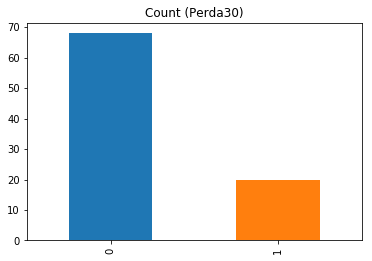

In [18]:
y_test.value_counts().plot(kind='bar', title='Count (Perda30)');

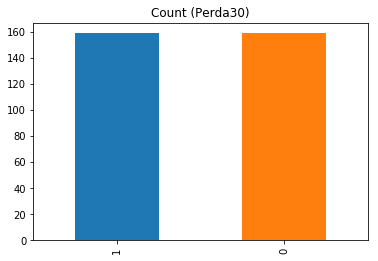

In [19]:
y_train.value_counts().plot(kind='bar', title='Count (Perda30)');

<br>
## Neural Network - Scaled with StandardScaller

In [20]:
steps = [('scaler', StandardScaler()),(('neural', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 32), random_state=42, max_iter=500, warm_start=True)))]
pipeline = Pipeline(steps)

hidden_layer_sizes=(n1, n2,..., nx) <br>
n1 = number of neurons in hidden layer_1 <br>
nx = number of neurons in hidden layer_x <br>

In [21]:
neural_scaled = pipeline.fit(X_train, y_train)

In [22]:
y_pred = pipeline.predict(X_test) 

In [23]:
accuracy_score(y_test, y_pred)

0.7840909090909091

In [24]:
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

In [25]:
#for i in range(len(y_pred)):
#    print(y_pred_prob[i],y_pred[i])

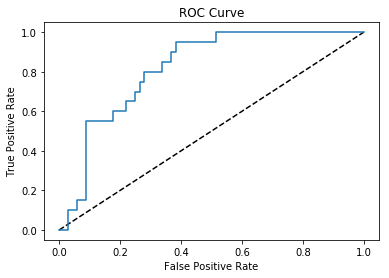

In [26]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [27]:
# roc_auc_score(y_test, y_pred_prob)

Confusion matrix, without normalization


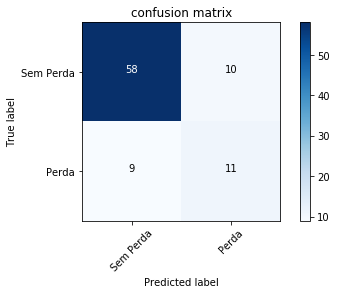

In [29]:
printcfm(y_test,y_pred, title='confusion matrix')

In [30]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.85      0.86        68
          1       0.52      0.55      0.54        20

avg / total       0.79      0.78      0.79        88



In [31]:
# cv_scores = cross_val_score(pipeline, X, y, cv=5)

In [32]:
# print(cv_scores)

# print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


<br>
## Neural Network - Scaled with MinMaxScaller

In [33]:
steps = [('scaler', MinMaxScaler()),(('neural', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 32), random_state=42, max_iter=1000, warm_start=True)))]
pipeline = Pipeline(steps)

hidden_layer_sizes=(n1, n2,..., nx) <br>
n1 = number of neurons in hidden layer_1 <br>
nx = number of neurons in hidden layer_x <br>

In [34]:
#neural_scaled = pipeline.fit(X_train, y_train)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('neural', MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 32), learning_rate='constant',
       learning_rate_init=...
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=True))])

In [35]:
print(neural_scaled)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('neural', MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 32), learning_rate='constant',
       learning...
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=True))])


In [36]:
y_pred = pipeline.predict(X_train) 

In [37]:
accuracy_score(y_train, y_pred)

0.9654088050314465

In [38]:
y_pred_prob = pipeline.predict_proba(X_train)[:,1]
y_scores = cross_val_predict(pipeline, X_train, y_train, cv=3, method='predict_proba' )
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=3)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

In [39]:
# for i in range(len(y_pred)):
#     print(y_pred_prob[i],y_pred[i], y_scores[i])

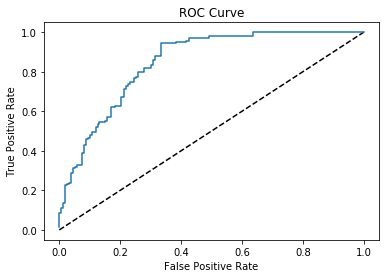

In [40]:
# Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [41]:
roc_auc_score(y_train, y_scores)

0.8472370554962225

Confusion matrix, without normalization


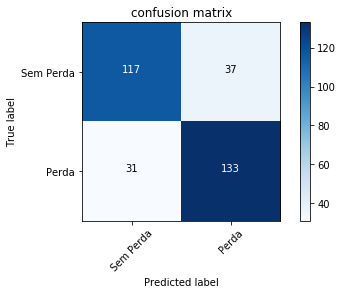

In [43]:
printcfm(y_train_pred, y_pred, title='confusion matrix')

In [44]:
print(classification_report(y_train_pred, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.76      0.77       154
          1       0.78      0.81      0.80       164

avg / total       0.79      0.79      0.79       318



In [45]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(cv_scores)

[0.83 0.83 0.89 0.86 0.82]


## Fine-tunning the model.

In [46]:
rn = MLPClassifier(max_iter=1000, random_state=42)
parameters = {'solver': ['lbfgs','adam','sgd'], 'alpha': 10.0 ** -np.arange(1, 7),
             'hidden_layer_sizes': [x for x in itertools.product((5,10,20,30,60,100),repeat=3)]
             }
cv = GridSearchCV(rn, param_grid=parameters, verbose=3, n_jobs=-1)


In [47]:
#  rf.fit(X_train, y_train);
# cv.fit(X_train, y_train);

In [48]:
# print(cv.best_params_)

In [49]:
# y_pred = cv.predict(X_test)

In [50]:
# final_model =cv.best_estimator_
# final_model

### Best Model Result (11/2018)
MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 100, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Best Model Result (09/2018)
MLPClassifier(activation='relu', alpha=alpha, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 60), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Regularization of the best model

In [51]:
alpha = 0.01

In [52]:
steps = [('scaler', MinMaxScaler()),(('neural', MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 100, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)))]
pipeline = Pipeline(steps)

In [53]:
#neural_scaled = pipeline.fit(X_train, y_train)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('neural', MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 100, 5), learning_rate='constant',
       learning_rate_in...      solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))])

In [54]:
y_pred = pipeline.predict(X_train) 

In [55]:
acc_train = accuracy_score(y_train, y_pred)

In [56]:
y_pred_prob = pipeline.predict_proba(X_train)[:,1]
y_scores = cross_val_predict(pipeline, X_train, y_train, cv=3, method='predict_proba' )
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=3)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

In [57]:
#for i in range(len(y_pred)):
#    print(y_pred_prob[i],y_pred[i])

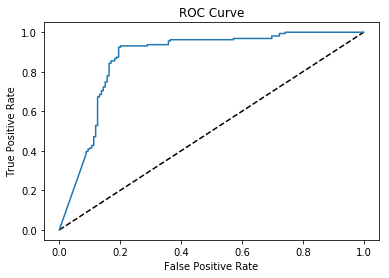

In [58]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [59]:
auc_train = roc_auc_score(y_train, y_scores)

Confusion matrix, without normalization


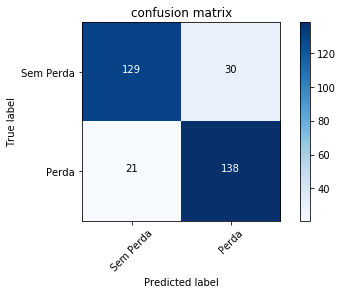

In [61]:
printcfm(y_train, y_train_pred, title='confusion matrix')

In [62]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.86      0.81      0.83       159
          1       0.82      0.87      0.84       159

avg / total       0.84      0.84      0.84       318



## Precision/Recall Tradeoff

In [63]:
#y_scores = cross_val_predict(pipeline, X_train, y_train, cv=3, method='predict_proba' )
# print(y_scores)
# print(np.mean(y_scores))

In [64]:
#y_pred_prob

In [65]:
# y_scores.shape

In [66]:
# # hack to work around issue #9589 in Scikit-Learn 0.19.0
# if y_scores.ndim == 2:
#     y_scores = y_scores[:, 1]

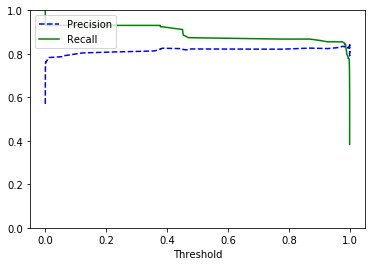

In [67]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [68]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3)
print(cv_scores)
print(np.mean(cv_scores))

[0.86 0.87 0.79]
0.839622641509434


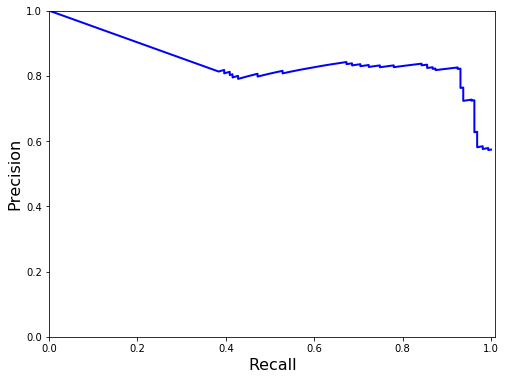

In [69]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1.01, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [70]:
# precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_prob)
# def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
#     plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
#     plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
#     plt.xlabel("Threshold")
#     plt.legend(loc="upper left")
#     plt.ylim([0, 1])
# plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# plt.show()

## Varying the Threshold for train set

In [71]:
predict_mine = np.where(y_pred_prob > 0.55, 1, 0)

In [72]:
y_train_pred_90 = (y_scores > .5)

In [73]:
precision = precision_score(y_train, y_train_pred_90)
recall = recall_score(y_train, y_train_pred_90)
print(precision, recall)

0.8214285714285714 0.8679245283018868


Confusion matrix, without normalization


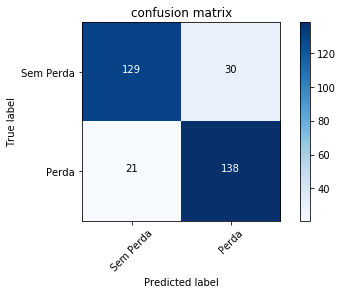

In [75]:
printcfm(y_train, y_train_pred, title='confusion matrix')

In [76]:
print(classification_report(y_train, predict_mine))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       159
          1       1.00      1.00      1.00       159

avg / total       1.00      1.00      1.00       318



# Evaluating the model with Cross-Validation

In [77]:
y_pred_prob = pipeline.predict_proba(X_train)[:,1]

In [78]:
y_scores = cross_val_predict(pipeline, X_train, y_train, cv=3, verbose=3, method='predict_proba')

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


In [79]:
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=3, verbose=3)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


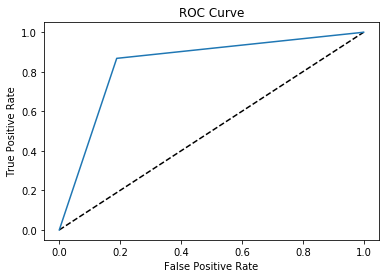

In [80]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [81]:
auc_train = roc_auc_score(y_train, y_train_pred)
auc_train

0.8396226415094341

Confusion matrix, without normalization


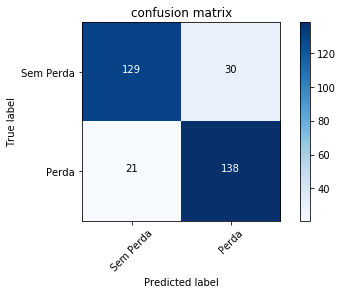

In [83]:
printcfm(y_train, y_train_pred, title='confusion matrix')

In [84]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.86      0.81      0.83       159
          1       0.82      0.87      0.84       159

avg / total       0.84      0.84      0.84       318



# Predicting the Classes in Test Set

In [85]:
y_pred = pipeline.predict(X_test)

In [86]:
acc_test = accuracy_score(y_test, y_pred)

In [87]:
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

In [88]:
#for i in range(len(y_pred)):
#    print(y_pred_prob[i],y_pred[i])

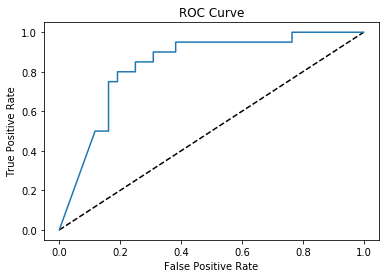

In [89]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [90]:
auc_test = roc_auc_score(y_test, y_pred_prob)

Confusion matrix, without normalization


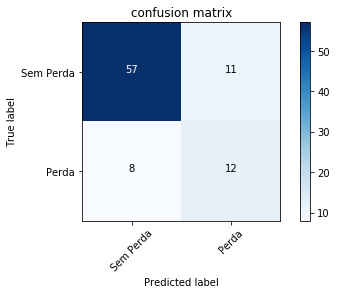

In [92]:
printcfm(y_test, y_pred, title='confusion matrix')

In [93]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.84      0.86        68
          1       0.52      0.60      0.56        20

avg / total       0.80      0.78      0.79        88



## Varying the Threshold for test set

In [94]:
predict_mine = np.where(y_pred_prob > .4, 1, 0)

Confusion matrix, without normalization


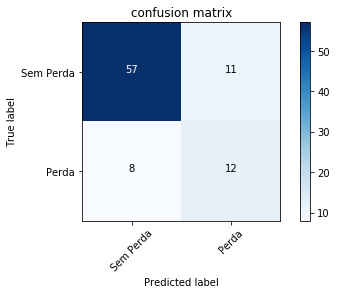

In [96]:
printcfm(y_test, predict_mine, title='confusion matrix')

In [97]:
print(classification_report(y_test, predict_mine))

             precision    recall  f1-score   support

          0       0.88      0.84      0.86        68
          1       0.52      0.60      0.56        20

avg / total       0.80      0.78      0.79        88



In [98]:
precision_score(y_test, predict_mine)

0.5217391304347826

## Results

In [99]:
print("Alpha: ", alpha)
print("AUC Train: %3.3f" % (auc_train))
print("Accuracy Train: %3.2f%%" % (acc_train*100))
print("AUC test: %3.2f" % (auc_test))
print("Accuracy Test %3.2f%%" % (acc_test*100))

Alpha:  0.01
AUC Train: 0.840
Accuracy Train: 100.00%
AUC test: 0.84
Accuracy Test 78.41%


In [100]:
X=np.concatenate((X_train,X_test),axis=0)
y=np.append(y_train,y_test)

In [ ]:
print(__doc__)

# param_range = 10.0 ** -np.arange(1, 7),
param_range = np.logspace(-5, 7, 5)

train_scores, test_scores = validation_curve(
    pipeline, X, y, param_name="neural__alpha", param_range=param_range,
    cv=10, scoring="roc_auc", n_jobs=-1, verbose=3)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with MLP")
plt.xlabel("$\alpha$")
plt.ylabel("AUC")
#plt.ylim(0.0, 1.1)
#plt.xlim(-1, 22)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Automatically created module for IPython interactive environment


# Add learning curves